# DS3000 Final Project: COVID19 Herd Immunity
## Team 38

- Swasti Dadhich (dadhich.s@northeastern.edu)
- Emily Gringorten (gringorten.e@northeastern.edu)
- Ngoc Khanh Vy Le (le.ngoc@northeastern.edu)
- Neva Olliffe (olliffe.n@northeastern.edu)


### Reuse permissions
The following may be re-used for educational purposes:
   - all data included with submission
   - all images
   - this report and the notebooks which collected / cleaned the data

Please attribute any work to the authors listed above.


# Executive summary: 
COVID-19 took the world by storm in 2020, resulting in massive fatalities and changes to everyday life. The first vaccines started rolling out in December 2021, promising defense against this disease. As a group we wanted to work on a project where we could  to use predictive regression and analysis to understand when herd immunity would be reached through covid-19 vaccination. Alongside the immunisation data, we include discussion which includes the daily/total number of cases as well as the various waves that the virus affected the United States. By looking at [the data](#vax_data) , the number of people who are vaccinated (both fully or just the first dose) is increasing daily. In addition, if we assume that we can get herd immunity when 60%-85% population vaccinated, we will likely to be successful by [June 07, 2021](#herd_data).

# Ethical Considerations
The data within this report should be handled very carefully. The US COVID-19 response has been plagued by misinformation, and the models used in this report do not align with epidemiological standards. For this reason, this project should under no circumstances be used to make public health (or personal health) decisions. 

Our immunization projection suggests that herd immunity will be reached relatively easily in the very near future, with 100% immunization not far behind. If these projections are taken as fact, there could be a myriad of ethical issues: 

- This data would benefit vaccine companies as well as those responsible for the rollout. It suggests that vaccination has been and will be extremely successful in curbing the spread of COVID-19. However, the analysis does not account for vaccine hesitancy or "anti-vax" movements that will likely cause the rate of vaccination to begin slowing in the near future.

- By presenting data for the US as a whole, this data does not account for issues with vaccine equity; in Massachusetts alone, [black and hispanic populations are undervaccinated compared to white individuals](https://www.mass.gov/doc/weekly-covid-19-vaccination-report-april-15-2021/download). 

- This data could be used to argue for immediate relaxation of public health measures designed to prevent the spread of COVID-19 (for example, mask mandates). Under **no circumstances** should be this data be used to inform public health decisions. The models are far from perfect and the data is outdated. In particular, our analysis of the relationship between daily COVID cases and vaccinations suggests that rising vaccinations have already caused COVID cases to plummet. This is **not** accurate, as the numerical analysis ignores a major confounding variable (rising vaccinations coincide with the end of the COVID wave caused by holiday gatherings). 


# Introduction

With COVID-19 vaccines beginning to roll out, many are left with the question "When will things go back to normal"? Though there isn't one specific definition of what exactly normal is, many agree that once herd immunity is reached it will be safe enough to go back to a semi normal life. Herd immunity is a form of indirect protection from infectious disease that can occur when a sufficient percentage of a population has become immune. Vaccine distribution is ramping up quickly with around 3.3 million doses being administered a day (compared to about 0.9 million a day in mid January)(NY Times). This increase can be modeled using computational tools, such as regression, allowing us to predict when herd immunity will be reached in the United States. 

Source: https://www.nytimes.com/interactive/2020/us/covid-19-vaccine-doses.html


# Data Description

This project uses COVID-19 case data from [Covid Tracker API](https://covidtracking.com/data/api) to estimate the number of people in the US who have contracted COVID-19, and [vaccine data](https://covid.cdc.gov/covid-data-tracker/#vaccinations) from the CDC to track the number of people who are vaccinated.

Cumulative vaccine and case counts are included alongside daily case and vaccine counts. Date is represented both in datetime and string format for ease of graphing and indexing, respectively. 

In [1]:
import pandas as pd
from datetime import datetime

# read the CSV and set the index 
df_covid_info = pd.read_csv('covid vaccine and case data.csv')
df_covid_info = df_covid_info.set_index('Date string')

# convert Date back to datetime format
date_timestamp_format = df_covid_info['Date'].apply(datetime.strptime, args = ['%Y-%m-%d'])
df_covid_info['Date'] = date_timestamp_format

df_covid_info

,Date,Daily Count of People Fully Vaccinated,Total Doses Administered Daily,Total People Fully Vaccinated,Percent People Fully Vaccinated,cases change_from_prior_day,cases population_percent,total cases
Date string,,,,,,,,
2020-01-15,2020-01-15,0.0,0.0,0.0,0.000000,0.0,0.0000,0.0
2020-01-16,2020-01-16,0.0,0.0,0.0,0.000000,0.0,0.0000,0.0
2020-01-17,2020-01-17,0.0,0.0,0.0,0.000000,0.0,0.0000,0.0
2020-01-18,2020-01-18,0.0,0.0,0.0,0.000000,0.0,0.0000,0.0
2020-01-19,2020-01-19,0.0,0.0,0.0,0.000000,1.0,0.0000,1.0
...,...,...,...,...,...,...,...,...
2021-03-03,2021-03-03,1018068.0,2638302.0,30033845.0,9.151080,66836.0,8.6218,28520365.0
2021-03-04,2021-03-04,1099418.0,2881742.0,31133263.0,9.486064,65487.0,8.6416,28585852.0
2021-03-05,2021-03-05,1159374.0,2907159.0,32292637.0,9.839317,68787.0,8.6624,28654639.0


In [2]:
import numpy as np 

# use np.convolve to generate rolling averages 
y = np.convolve(df_covid_info['Daily Count of People Fully Vaccinated'], np.ones(7), 'valid') / 7
x = df_covid_info.index[0:412]
y2 = np.convolve(df_covid_info['Total Doses Administered Daily'], np.ones(7), 'valid') / 7

<a id='vax_data'></a>
Vaccination data

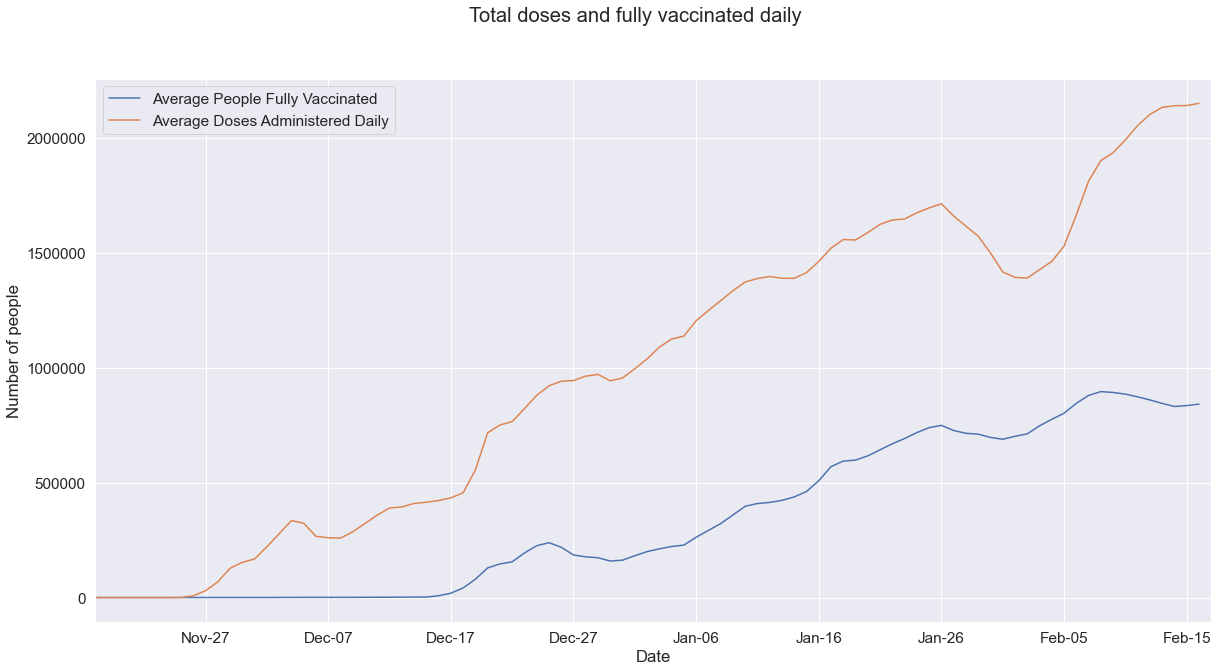

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# adjust font size
sns.set(font_scale = 1.4)

# ploting the x and y axis
plt.plot(x, y, label = 'Average People Fully Vaccinated')
plt.plot(x, y2, label = 'Average Doses Administered Daily')

# format x tick labels using strptime/strftime format string
my_fmt = mdates.DateFormatter('%b-%d')
plt.gca().xaxis.set_major_formatter(my_fmt)

# groom the graph
plt.legend()
plt.gcf().set_size_inches(20,10)
plt.suptitle('Total doses and fully vaccinated daily')
plt.xlabel('Date')
plt.ylabel('Number of people')
plt.xlim(['2020-12-01', '2021-03-07'])

# adjust ticks for legibility
plt.ticklabel_format(axis='y', style='plain')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))

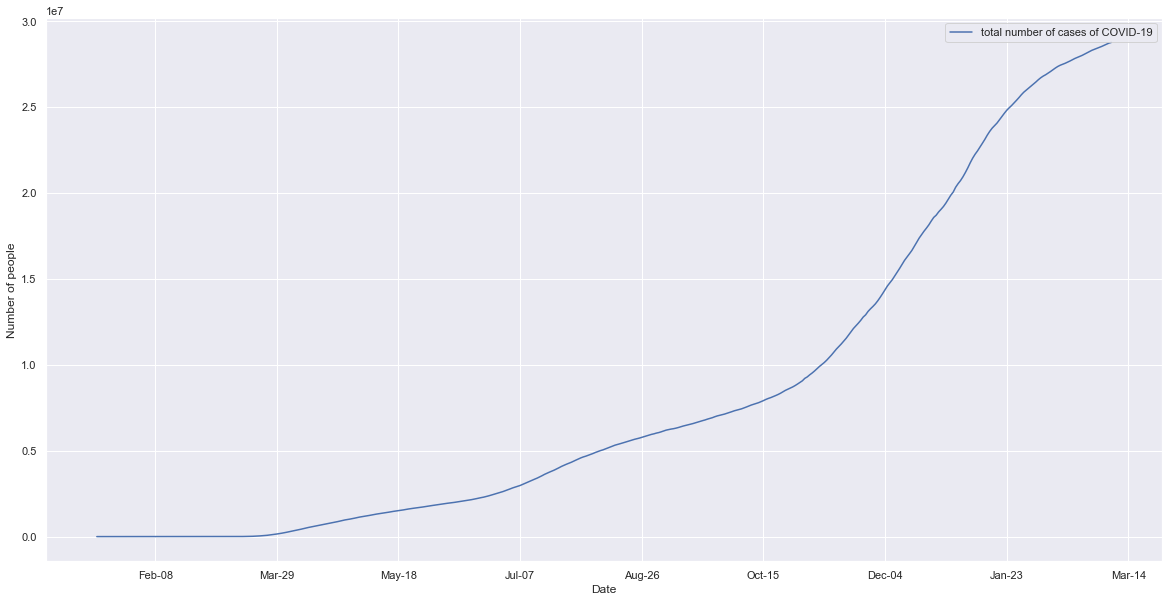

In [4]:
sns.set()

# ploting the x and y axis 
plt.plot(df_covid_info['Date'], df_covid_info['total cases'], label='total number of cases of COVID-19')


# format x tick labels using strptime/strftime format string
my_fmt = mdates.DateFormatter('%b-%d')
plt.gca().xaxis.set_major_formatter(my_fmt)

# groom graph
plt.legend()
plt.gcf().set_size_inches(20,10)
plt.xlabel('Date')
plt.ylabel('Number of people')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))

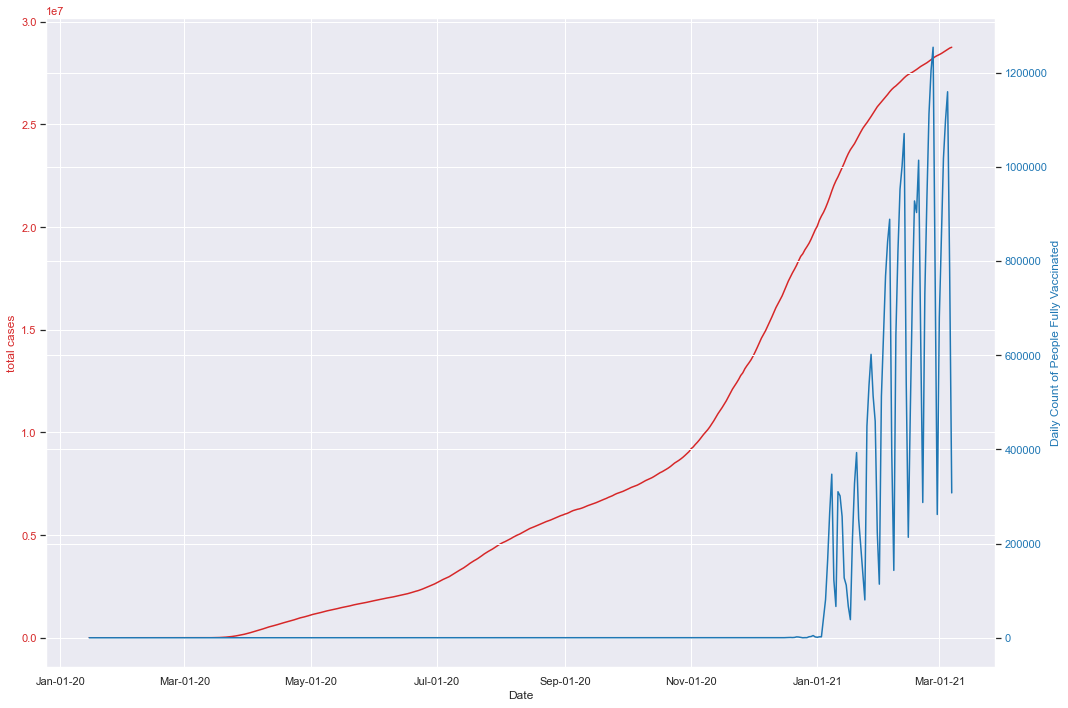

In [5]:
fig, ax1 = plt.subplots(figsize=(15,10))
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('total cases', color=color)
ax1.plot(df_covid_info['Date'], df_covid_info['total cases'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Daily Count of People Fully Vaccinated', color=color) 
ax2.plot(df_covid_info['Date'], df_covid_info['Daily Count of People Fully Vaccinated'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# reformat the y axis to be in plain numbers instead of scientific notation
plt.ticklabel_format(axis='y', style='plain')

# format x tick labels using strptime/strftime format string
my_fmt = mdates.DateFormatter('%b-%d-%y')
plt.gca().xaxis.set_major_formatter(my_fmt)

# reformat the y axis to be in plain numbers instead of scientific notation
plt.ticklabel_format(axis='y', style='plain')


fig.tight_layout() 
plt.show()

# Method
For this project, we will be relying primarily on [regression](http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm) using [exponential](https://online.stat.psu.edu/stat501/lesson/15/15.7) or [polynomial](https://online.stat.psu.edu/stat462/node/158/) models to fit a mathematical model to observed data about infections and vaccinations. We will try to model 3 relationships: 
- Percent of the population that is fully vaccinated as time progresses (to predict when herd immunity will be reached)
- Daily COVID-19 cases as time progresses (to examine the dynamics of disease spread)
- Daily COVID-19 cases as the percentage of the population that is fully vaccinated increases (to determine how immunity by vaccine affects disease spread)

These models assume that the current/previously observed rate of COVID-19 cases and vaccinations will continue into the future. Unfortunately, this is not a great assumption for the data at hand--for example, the rate of vaccinations will slow once everyone who wants a vaccine is able to access one. Our models do not account for "anti-vax" individuals, or the relation between holiday gatherings and increases in COVID cases. 

A more effective model for estimating this data would have been the [SIR model](https://www.maa.org/press/periodicals/loci/joma/the-sir-model-for-spread-of-disease-the-differential-equation-model), which is more commonly used in epidemiological modeling. This takes into account individuals from three groups: susceptible, immmune, and recovered. These groups are then used to make predictions about future trends in disease spread. 

# Results

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures


def crossval_poly_reg(x, y, degree = 2, shuffle = True, splits = 10): 
    """ fit a cross-validated linear regression model to the given data in exponential form; plot the result 
    
        Args: 
            x (array): an array containing the x values 
            y (array): an array containing the y values
            degree (int): the degree polynomial that should be modeled 
            shuffle (boolean): whether or not the data should be shuffled in the kfold
            splits (int): the number of splits for the kfold
            
        Returns: 
            y_pred (array): the predicted y values 
            crossval_r2 (float): the cross-validated r2 value
    """
    
    # project data to a polynomial model of the given degree
    poly_project = PolynomialFeatures(degree=degree)
    x_poly = poly_project.fit_transform(x)
    
    # initialize a k fold and linear regression
    kfold = KFold(n_splits = splits, shuffle = shuffle)
    reg = LinearRegression(fit_intercept=False)

    # initialize an empty array for y_pred 
    y_pred = np.empty_like(y)

    for train_idx, test_idx in kfold.split(x_poly, y): 
        # split data into train and test data
        x_poly_test = x_poly[test_idx, :]
        x_poly_train = x_poly[train_idx, :]
        y_train = y[train_idx]

        # fit the linear model to the training data
        reg.fit(x_poly_train, y_train)

        # predict y 
        y_pred[test_idx] = reg.predict(x_poly_test)

    # compute the cross validated r2
    crossval_r2 = r2_score(y_true=y, y_pred=y_pred)
    
    return y_pred, crossval_r2

In [7]:
def test_poly_degrees(x, y,  xlabel, ylabel, title, max_degree = 10): 
    """ Runs crossvalidated polynomial models for different degrees and returns a plotted result
    
        Args: 
            x (array): the x data 
            y (array): the y data 
            xlabel (string): the name of the x axis
            ylabel (string): the name of the y axis
            title (string): the title of the figure and the name of the pdf
            shuffle (Boolean): whether or not the data should be shuffled in the kfold for crossvalidation
            
        Returns: 
            r2_dict_list (list): a list containing information about the r2 for each degree
    """
    
    # set number of plots vertically
    vert_plots = int(np.ceil(max_degree/2)+1)
    
    # initalize subplot
    fig, axs = plt.subplots(vert_plots, 2)

    # track r2 values 
    r2_dict_list = []

    # test polynomial models up to the max degree
    for degree in range(max_degree+1): 

        # get the cross-validated y_pred and r2 for this degree
        y_pred, crossval_r2 = crossval_poly_reg(x, y, degree = degree)

        # track the r2 per degree
        r2_dict = {'degree':degree, 
                   'r2 per degree': crossval_r2/degree}
        r2_dict_list.append(r2_dict)

        # get subplot index 
        subplt_x = degree%2
        subplt_y = int(np.floor(degree/2))

        # plot the true and predicted values for this model
        axs[subplt_y, subplt_x].plot(x, y, label = 'true')
        axs[subplt_y, subplt_x].plot(x, y_pred, label = 'predicted')

        # format the plot
        axs[subplt_y, subplt_x].set_title(f'Degree {degree}, r2 = {crossval_r2:.3f}')
        axs[subplt_y, subplt_x].legend()

    # add axis labels 
    for ax in axs.flat:
        ax.set(xlabel=xlabel, ylabel=ylabel)

    # access and plot r2 per degree information
    r2_df = pd.DataFrame(r2_dict_list)
    axs[vert_plots-1, 1].plot(r2_df['degree'], r2_df['r2 per degree'])
    plt.xlabel('degree')
    plt.ylabel('r2 per degree')
    axs[vert_plots-1,1].set_title('R2 per degree')

    # format the whole figure 
    plt.gcf().set_size_inches(10, 1.5*max_degree)
    plt.subplots_adjust(hspace = 0.8, wspace = 0.4)
    plt.suptitle(title)
    
    # save as a pdf 
    plt.savefig(f'{title}.pdf')
    
    return r2_dict_list

#### Fit a regression model to predict % fully vaccinated from date 

In [8]:
# slice df to keep data from Jan 1, 2021 on (when vaccinations are increasing)
post_jan_df = df_covid_info.loc['2021-01-01':, :]

# add a column to the dataframe that counts the days since Jan 1, 2021
days = np.empty_like(post_jan_df.index)
days.fill(1)
days_since_jan = np.cumsum(days)
post_jan_df['Days since start'] = days_since_jan

<ipython-input-8-afaa8790593b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_jan_df['Days since start'] = days_since_jan


<ipython-input-7-e3b267a203a6>:33: RuntimeWarning: divide by zero encountered in double_scalars
  'r2 per degree': crossval_r2/degree}


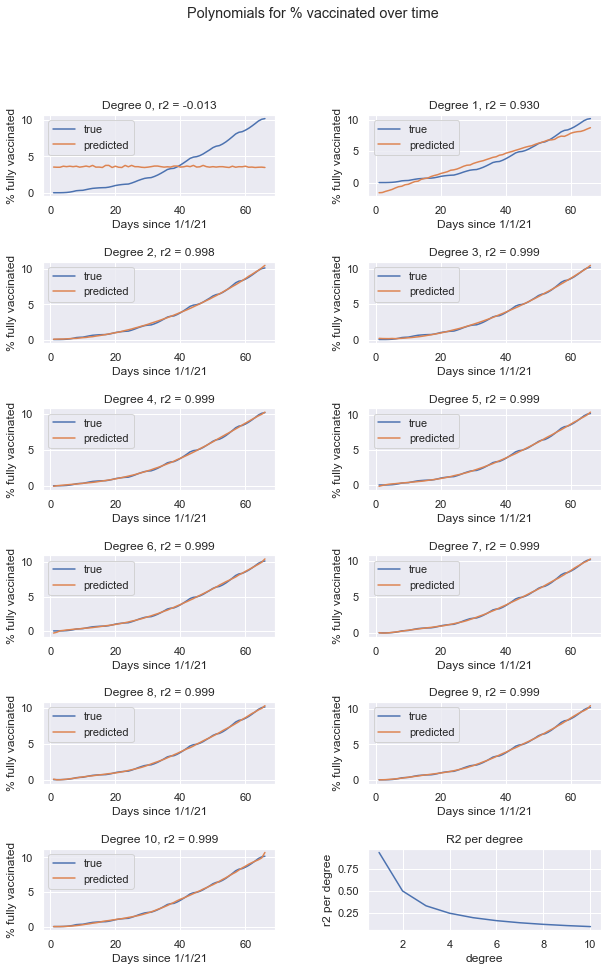

In [9]:
# get x (days) and y (% vaccinated)
x = np.array(post_jan_df.loc[:, 'Days since start']).reshape(-1, 1)
y = np.array(post_jan_df.loc[:, 'Percent People Fully Vaccinated'])

# test polynomials up to degree 10 to check for a good fit
r2_dict_list = test_poly_degrees(x, y,  xlabel = 'Days since 1/1/21', 
                                 ylabel = '% fully vaccinated', 
                                 title = 'Polynomials for % vaccinated over time')

The most appropriate model for % fully vaccinated vs time is 2nd degree. It has a slightly lower r2 per degree than a 1st degree model, but it is a better fit for the data and takes into account the increasing rate of vaccinations since Jan 1st, which corresponds to the increasing production of vaccines and increasing eligibility to receive vaccines. 

In [10]:
# Get data for days since Jan 1, % fully vaccinated, and generate 'future_x' that represents days 0-180
x = np.array(post_jan_df.loc[:, 'Days since start']).reshape(-1, 1)
y = np.array(post_jan_df.loc[:, 'Percent People Fully Vaccinated'])
x_future = np.array(range(200)).reshape(-1, 1)

# fit data to 2nd degree polynomial
poly_project = PolynomialFeatures(degree=2)
x_poly = poly_project.fit_transform(x)
x_future_poly = poly_project.fit_transform(x_future)

# train a linear regression model on existing data and use it to predict future vaccine rates
reg = LinearRegression(fit_intercept=False)
reg.fit(x_poly, y)
y_pred = reg.predict(x_poly)
y_future_pred = reg.predict(x_future_poly)

<a id='herd_data'></a>
Herd immunity

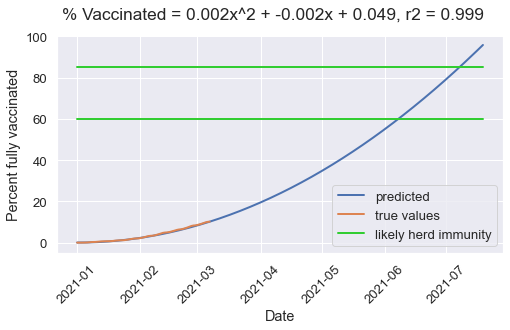

In [11]:
from datetime import datetime, timedelta

# define herd immunity percentages
lo_herd_per = 60
hi_herd_per = 85

# Initialize a datetime for Jan 1, 2021 and a 1-day timedelta
jan_1 = datetime(month = 1, day = 1, year = 2021)
td_day = timedelta(days = 1)


# Generate a datetime range for Jan 1, 2021 - end of predicted values (200 days after Jan 1, 2021)
dt_x_future = []
for day in range(200): 
    dt_day = (day*td_day) + jan_1
    dt_x_future.append(dt_day)

sns.set(font_scale = 1.2)

# plot the predicted and true vaccination values 
plt.plot(dt_x_future, y_future_pred, linewidth = 2, label = 'predicted')
plt.plot(dt_x_future[:66], y, linewidth = 2, label = 'true values')

# get the model and r2 value
a_0 = reg.coef_[0]
a_1 = reg.coef_[1]
a_2 = reg.coef_[2]
r2 = r2_score(y_true=y, y_pred=y_pred)

# add lines marking the expected range of herd immunity (60-85%)
lo_herd = np.empty_like(dt_x_future)
lo_herd.fill(lo_herd_per)
hi_herd = np.empty_like(dt_x_future)
hi_herd.fill(hi_herd_per)
plt.plot(dt_x_future, lo_herd, linewidth = 2, color = 'limegreen', label = 'likely herd immunity')
plt.plot(dt_x_future, hi_herd, linewidth = 2, color = 'limegreen')

# format plot 
plt.legend()
plt.suptitle(f'% Vaccinated = {a_2:.3f}x^2 + {a_1:.3f}x + {a_0:.3f}, r2 = {r2:.3f}')
plt.xlabel('Date')
plt.xticks(rotation = 45)
plt.ylabel('Percent fully vaccinated')
plt.gcf().set_size_inches(8,4)

# save as pdf
plt.savefig('percent vaccinated prediction.pdf')

This graph indicates that herd immunity, as defined by 60-85% of the population being fully vaccinated, will be achieved between early June and early July of 2021 according to our regression model. 

In [12]:
import math 

def quad_eqn_solver(a, b, c, y = 0): 
    """ Solves for x using a quadratic equation given the coefficients and a 
    
        Args: 
            a (float): the coefficient for the x^2 term 
            b (float): the coefficient for the x^1 term 
            c (float): the coefficient for the x^0 term; may or may not be adjusted to account for y 
            y (float): the y value we want to find corresponding x values for 
        Returns: 
            x_0 (float): the x value solved for using -b - sqrt(b^2 - 4ac)
            x_1 (float): the x value solved for using -b - sqrt(b^2 - 4ac)
    """
    
    # adjust c so that ax^2 + bx + c = 0
    c = c - y
    
    # solve for the sqrt(b^2-4ac) term
    inside_sqrt = b**2 - (4*a*c)
    sqrt_term = math.sqrt(inside_sqrt)
    
    # get the 2 numerators: -b + sqrt(b^2 + 4ac) and -b - sqrt(b^ + 4ac)
    mins_numerator = (-1 * b) - sqrt_term
    plus_numerator = (-1 * b) + sqrt_term
    
    # divide both numerators by 2a to get each x
    x_0 = mins_numerator/(2*a)
    x_1 = plus_numerator/(2*a)
    
    return x_0, x_1

In [13]:
# Calculate when "herd immunity will be reached" if vaccination continues at the current pace 
# define herd immunity as 60%-85% of population vaccinated, as noted in problem description 
lo_herd_immunity = 60
hi_herd_immunity = 85

# Using the coefficients from the 2nd degree model, solve for number of days when % vaccinated reaches herd immunity levels
lo_x1, lo_x2 = quad_eqn_solver(a = a_2, b = a_1, c = a_0, y = lo_herd_immunity)
hi_x1, hi_x2 = quad_eqn_solver(a = a_2, b = a_1, c = a_0, y = hi_herd_immunity)

# find the max days to herd immunity for each value 
days_to_lo_herd = max(lo_x1, lo_x2)
days_to_hi_herd = max(hi_x1, hi_x2)

# use a timedelta to calculate the date when herd immunity will be reached 
jan_1 = datetime(month = 1, day = 1, year = 2021)
td_to_lo_herd = timedelta(days = days_to_lo_herd)
td_to_hi_herd = timedelta(days = days_to_hi_herd)
date_lo_herd = jan_1 + td_to_lo_herd
date_hi_herd = jan_1 + td_to_hi_herd

# convert datetimes to a string format 
str_lo_herd = date_lo_herd.strftime('%B %d, %Y')
str_hi_herd = date_hi_herd.strftime('%B %d, %Y')

print(f'Herd immunity is predicted to be be reached between {str_lo_herd} and {str_hi_herd}.\n',
      f'{lo_herd_immunity}% of the US population is predicted to be fully vaccinated by {str_lo_herd}. \n',
      f'{hi_herd_immunity}% of the US population is predicted to be fully vaccinated by {str_hi_herd}. \n')

Herd immunity is predicted to be be reached between June 07, 2021 and July 07, 2021.
 60% of the US population is predicted to be fully vaccinated by June 07, 2021. 
 85% of the US population is predicted to be fully vaccinated by July 07, 2021. 



#### Model change in daily cases over time (since testing ramped up) 
Look at case data beginning 2/29/20 - the date the [FDA approved use of privately developed kits to due to faults in the CDC kit](https://www.washingtonpost.com/health/2020/02/29/new-fda-policy-will-expand-coronavirus-testing/). 

In [14]:
# Only look at cases after Feb 29, 2020 - the date the FDA allowed the use of privately developed test kits 
start_date = '2020-02-29'
post_feb_df = df_covid_info.loc[start_date:, :]

<ipython-input-7-e3b267a203a6>:33: RuntimeWarning: divide by zero encountered in double_scalars
  'r2 per degree': crossval_r2/degree}


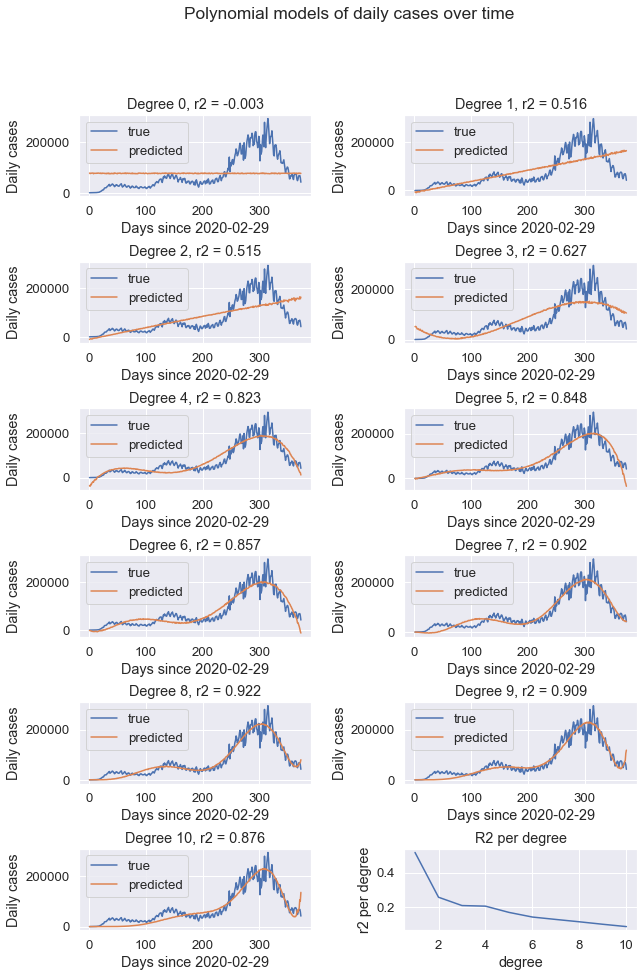

In [15]:
# get data
y = np.array(post_feb_df['cases change_from_prior_day'])

# Create an array counting the days since testing began ramping up (see note above)
day_ct = np.empty_like(y)
day_ct.fill(1)
day_ct = np.cumsum(day_ct)
x = np.array(day_ct).reshape(-1, 1)

r2_dict_list = test_poly_degrees(x, y,  xlabel = f'Days since {start_date}', 
                  ylabel = 'Daily cases', 
                  title = 'Polynomial models of daily cases over time') 

It's clear that no polynomial models, even at a high degree (likely prone to overfitting) will be able to appropriately daily cases that fluctuate as waves of COVID occur. As suggested by Prof. Sapiezynski, we will instead model each wave with an individual function to compare attributes such as how quickly they rose and fell, and the "base" level of infection before and after each wave.  

In [16]:
from scipy.signal import argrelextrema

def find_covid_extrema(feat, df_covid, window = 14, selector = np.less): 
    """ Uses a rolling average to smooth the feature of interest over the given window, then finds local extrema

        Args: 
            feat (string): the name of the feature of interest 
            df (dataframe): the dataframe to pull from 
            window (int): the size of the window a rolling average should be calculated for 
            selector (string): arg for argrelextrema; usually 'less' or 'greater'
            
        Returns: 
            extrema_indices (tuple): a tuple containing the indices of local extrema for the smoothed feature
    """
    # Compute a rolling average of the values of feat over the given window and center it
    roll_avg = df_covid.loc[:,feat].rolling(window=window, center = True).mean()
    roll_avg_array = np.array(roll_avg)
    
    # Find the local extrema (default local minima) using the scipy function argrelextrema() 
    extrema_indices = argrelextrema(roll_avg_array, selector, order = 10)

    return roll_avg_array, extrema_indices

In [17]:
# get the local minima by using a rolling average
roll_avg, local_mins_tuple = find_covid_extrema('cases change_from_prior_day', post_feb_df,
                                                 window = 28, selector = np.less)
local_mins = local_mins_tuple[0]

print(local_mins)

[ 91 191]


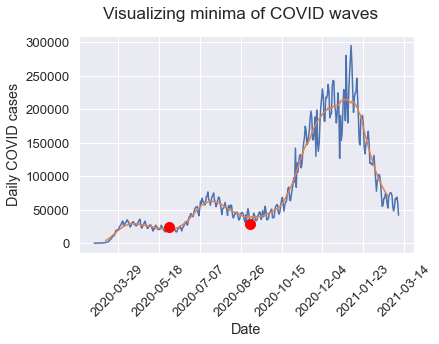

In [18]:
# get daily case data
x = post_feb_df['Date']
y = post_feb_df['cases change_from_prior_day']

# plot daily case data after Feb 29, 2020 (testing increased)
plt.plot(x, y)
plt.plot(x, roll_avg)

# plot calculated local mins as a sanity check 
for min_index in local_mins:
    
    # get the x and y coordinates for each local minima
    min_x = post_feb_df.iloc[min_index:min_index+1, :]['Date']
    min_y = post_feb_df.iloc[min_index:min_index+1, :]['cases change_from_prior_day']
    
    # plot each minima
    plt.plot(min_x, min_y, color = 'red', markersize = 10, marker = 'o')
    
# groom graph
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation = 45)
plt.xlabel('Date')
plt.ylabel('Daily COVID cases')
plt.suptitle('Visualizing minima of COVID waves')

# save as pdf
plt.savefig('COVID wave minima.pdf')

The predicted local minima seem relatively accurate for COVID case data. 

In [19]:
# Add a column representing days since start of wave data (will be the x for regression)
day_ct = np.empty_like(post_feb_df['cases change_from_prior_day'])
day_ct.fill(1)
day_ct = np.cumsum(day_ct)
post_feb_df['day count'] = day_ct

<ipython-input-19-d601f7deccf0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_feb_df['day count'] = day_ct


In [20]:
# initialize an empty list to track wave data 
waves_list = []

# add the first wave to the list
first_wave = post_feb_df.iloc[:local_mins[0], :]
waves_list.append(first_wave)

for i, min in enumerate(local_mins): 
    
    # if we are not at the last min, slice data between this min and the next
    if i+1 < len(local_mins):
        wave = post_feb_df.iloc[min:local_mins[i+1], :]
    
    # if this is the last min, slice data until the end of the df
    else: 
        wave = post_feb_df.iloc[min:, :]
    
    # append the wave to the list 
    waves_list.append(wave)

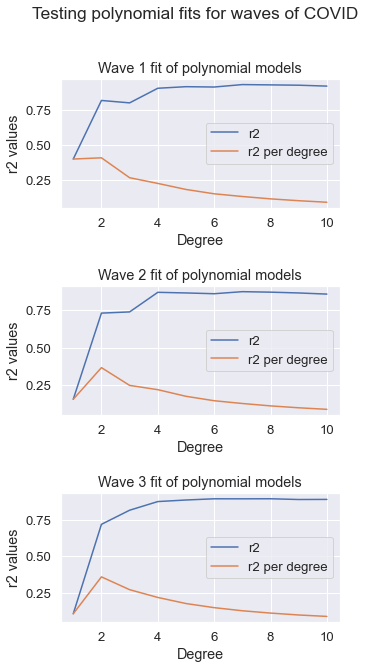

In [21]:
# initalize subplots
fig, axs = plt.subplots(len(waves_list), 1)

for i, wave in enumerate(waves_list): 
    # get x and y data 
    x = np.array(wave.loc[:, 'day count']).reshape(-1, 1)
    y = wave.loc[:, 'cases change_from_prior_day']
    
    # initialize a list to track the r2 for each degree and r2 per degree
    r2_list = []
    r2_per_deg_list = []
    
    # list degrees from 1-10
    degrees = range(1,11)
    
    # try fitting polynomial models of 1-10 degrees
    for deg in degrees: 
        
        # fit a crossvalidated polynomial model to this data
        y_pred, crossval_r2 = crossval_poly_reg(x, y, degree = deg)
        
        # track the crossvalidated r2 and r2 per degree
        r2_list.append(crossval_r2)
        r2_per_deg_list.append(crossval_r2/deg)
    
    # plot the r2 per degree  and r2 for this wave
    axs[i].plot(degrees, r2_list, label = 'r2')
    axs[i].plot(degrees, r2_per_deg_list, label = 'r2 per degree')
    
    # groom graph
    axs[i].legend()
    axs[i].set_title(f'Wave {i+1} fit of polynomial models')    
    
# add axis labels to all subplots
for ax in axs.flat:
    ax.set(xlabel='Degree', ylabel='r2 values')

# groom figure
plt.gcf().set_size_inches(5,10)
plt.suptitle('Testing polynomial fits for waves of COVID')
plt.subplots_adjust(hspace = 0.6)

# save as pdf
plt.savefig('wave polynomial fits.pdf')

The best degree for each wave is a second degree fit, so we will proceed with this fit. 

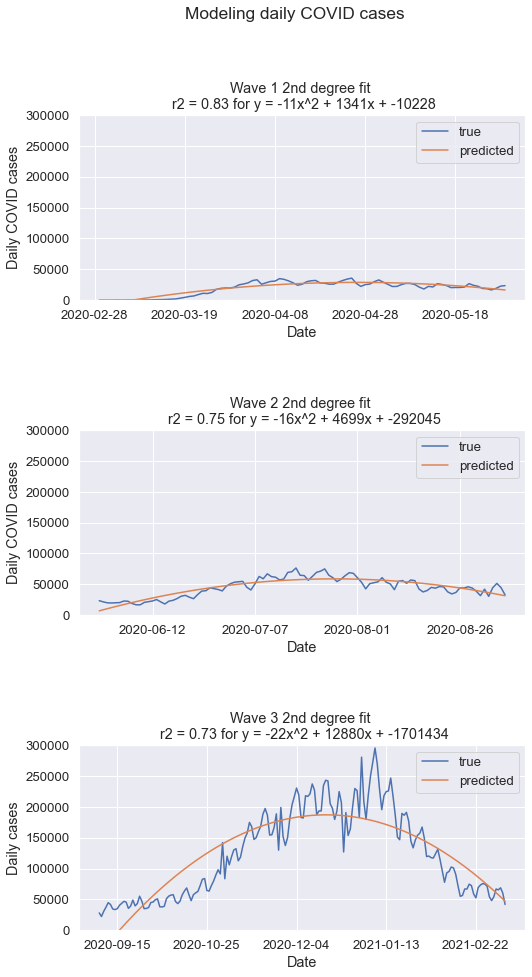

In [22]:
sns.set(font_scale = 1.2)

# initalize subplots
fig, axs = plt.subplots(len(waves_list), 1)

for i, wave in enumerate(waves_list):
    
    # get data 
    x = np.array(wave['day count']).reshape(-1,1)
    y = wave['cases change_from_prior_day']
    
    # project to polynomial 
    poly_project = PolynomialFeatures(degree=2)
    x_poly = poly_project.fit_transform(x)
    
    # initialize and train a linear regression
    reg = LinearRegression(fit_intercept=False)
    reg.fit(x_poly, y)
    
    # predict y and compute the r2
    y_pred = reg.predict(x_poly)
    r2 = r2_score(y_true=y, y_pred=y_pred)

    # graph model 
    axs[i].plot(wave['Date'], y, label = 'true')
    axs[i].plot(wave['Date'], y_pred, label = 'predicted')
    
    # get coefficients
    c = reg.coef_[0]
    b = reg.coef_[1]
    a = reg.coef_[2]
    
    #groom axis 
    axs[i].set_title(f'Wave {i + 1} 2nd degree fit \n r2 = {r2:.2f} for y = {a:.0f}x^2 + {b:.0f}x + {c:.0f}')
    axs[i].legend()
    axs[i].xaxis.set_major_locator(plt.MaxNLocator(5))
    axs[i].set_ylim([0,300000])

    
# add axis labels to all subplots
for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='Daily COVID cases')
    
# groom figure
plt.xlabel('Date')
plt.ylabel('Daily cases')
plt.suptitle('Modeling daily COVID cases')
plt.gcf().set_size_inches(8,15)
plt.subplots_adjust(hspace = 0.7)


# save as pdf
plt.savefig('2nd degree model COVID waves.pdf')

It looks like a second degree model is not accounting for the tails of each wave, resulting in a worse fit. It does seem clear that successive waves have higher peak and baseline infections. 

#### Model how daily COVID cases change as the % fully vaccinated increases

<ipython-input-7-e3b267a203a6>:33: RuntimeWarning: divide by zero encountered in double_scalars
  'r2 per degree': crossval_r2/degree}


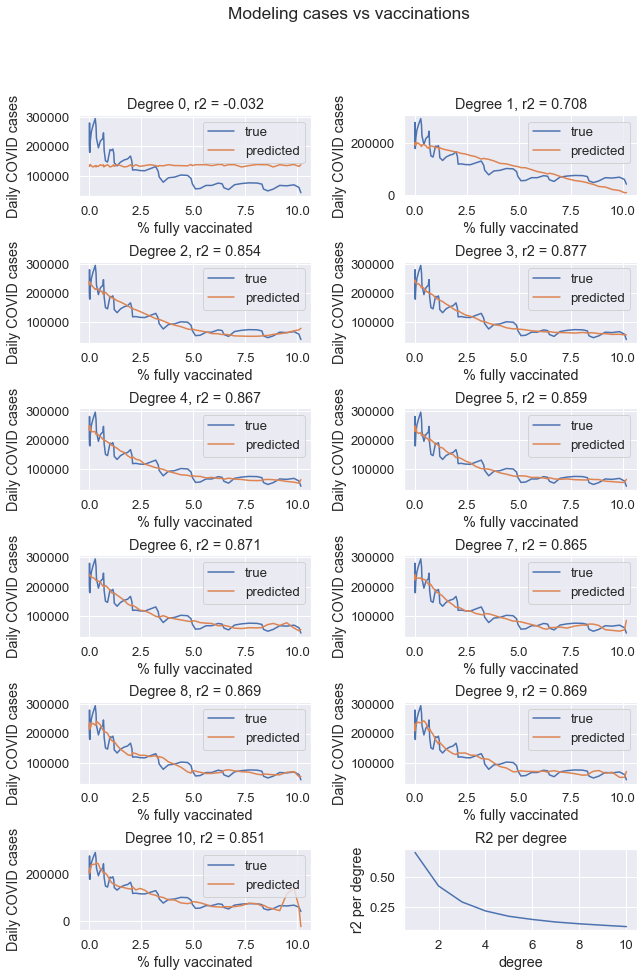

In [23]:
# try cross-validating a second degree polynomial fit to the vaccine-case data
degree = 2

# get x (% vaccinated) and y (daily cases)
x = np.array(post_jan_df.loc[:, 'Percent People Fully Vaccinated']).reshape(-1, 1)
y = np.array(post_jan_df.loc[:, 'cases change_from_prior_day'])

# test polynomials up to degree 10 to check for a good fit
r2_dict_list = test_poly_degrees(x, y,  xlabel = '% fully vaccinated', 
                                 ylabel = 'Daily COVID cases', 
                                 title = 'Modeling cases vs vaccinations')

A second degree model seems to be performing the best here, although it indicates that COVID cases will begin rising again after 10% of the population is fully vaccinated, which doesn't make sense. We can try fitting a polynomial model instead. 

In [24]:
# get data
x = np.array(post_jan_df.loc[:, 'Percent People Fully Vaccinated']).reshape(-1, 1)
y = np.array(post_jan_df.loc[:, 'cases change_from_prior_day'])
y_log = np.log(y)

# initialize a k fold and linear regression
kfold = KFold(n_splits = 10, shuffle = True)
reg = LinearRegression()

# initialize an empty array for y_pred 
y_pred = np.empty_like(y_log)

for train_idx, test_idx in kfold.split(x, y_log): 
    # split data into train and test data
    x_test = x[test_idx, :]
    x_train = x[train_idx, :]
    y_log_train = y_log[train_idx]

    # fit the linear model to the training data
    reg.fit(x_train, y_log_train)

    # predict y 
    y_hat = reg.predict(x_test)
    y_pred[test_idx] = np.exp(y_hat)

    # print the model 
    a_0_pred = np.exp(reg.intercept_)
    a_1_pred = reg.coef_[0]
    print(f'model: y_hat = {a_0_pred:.2f}e^({a_1_pred:.2f})x')

# compute the cross validated r2
crossval_r2 = r2_score(y_true=y, y_pred=y_pred)

model: y_hat = 206085.09e^(-0.16)x
model: y_hat = 206233.12e^(-0.16)x
model: y_hat = 203904.11e^(-0.15)x
model: y_hat = 202686.60e^(-0.15)x
model: y_hat = 207243.98e^(-0.16)x
model: y_hat = 206562.94e^(-0.16)x
model: y_hat = 205745.96e^(-0.16)x
model: y_hat = 200034.26e^(-0.15)x
model: y_hat = 205349.71e^(-0.16)x
model: y_hat = 201873.21e^(-0.15)x


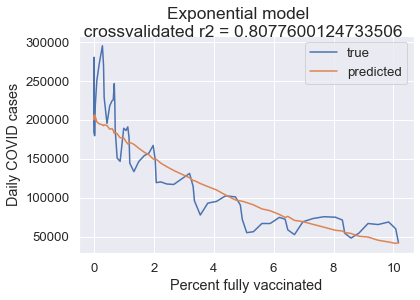

In [25]:
# plot the exponential model against the real data
plt.plot(x, y, label = 'true')
plt.plot(x, y_pred, label = 'predicted')
plt.legend()

# format the plot
plt.suptitle(f'Exponential model \n crossvalidated r2 = {crossval_r2}')
plt.xlabel('Percent fully vaccinated')
plt.ylabel('Daily COVID cases')
plt.legend()

An exponential model may be more appropriate for the case-vaccination relationship, but it indicates that very low vaccination rates are causing daily cases to fall precipitously.

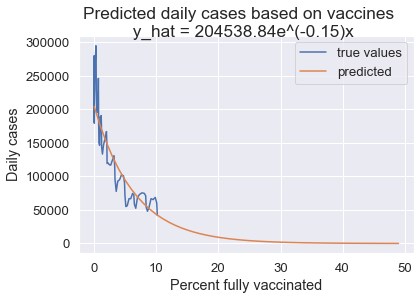

In [26]:
# get data
x = np.array(post_jan_df.loc[:, 'Percent People Fully Vaccinated']).reshape(-1, 1)
y = np.array(post_jan_df.loc[:, 'cases change_from_prior_day'])

# model up to 50% fully vaccinated 
future_vax = np.array(range(50)).reshape(-1,1)

# train a linear regression on the log of y
reg = LinearRegression()
reg.fit(x, np.log(y))
y_future_pred = np.exp(reg.predict(future_vax))

# plot the predicted and true vaccination values
plt.plot(x, y, label = 'true values')
plt.plot(future_vax, y_future_pred, label = 'predicted')

# Get the model 
a_0_pred = np.exp(reg.intercept_)
a_1_pred = reg.coef_[0]


# format plot 
plt.legend()
plt.suptitle(f'Predicted daily cases based on vaccines \n y_hat = {a_0_pred:.2f}e^({a_1_pred:.2f})x')
plt.xlabel('Percent fully vaccinated')
plt.ylabel('Daily cases') 
plt.savefig('Daily cases vs percent vaccinated.pdf')

This model indicates that daily cases will reach zero as a result of about 30% of the population being vaccinated. 

# Discussion
**Vaccinations over time:**
According to our model, herd immmunity (60-85% of population is immune) will be reached between June 5, 2021 and July 5, 2021. If this were true, it would mean that public health measures could likely be eased, though not rolled back fully, around this time. Unfortunately, our model fails to account for the likely slowing of vaccinations as everyone in the population who wants a vaccine is able to access one. The "anti-vax" movement and individuals with vaccine hesitancy mean that 100% vaccinations will not be reached, which our model fails to account for. 

**Cases over time:**
Our models of COVID cases over time are imperfect, and do not do a good job of modeling the gaps between wave of infections or predicting when additional COVID waves are likely to follow. However, the models do indicate that successive waves have resulted in higher peaks (maximal numbers of daily infections) as well as higher troughs (residual COVID cases after the "wave" has passed). This is likely due to the loosening of public health restrictions (for example, [ending mask mandates](https://www.usnews.com/news/best-states/articles/these-are-the-states-with-mask-mandates)) as well as decreased individual compliance with public health recommendations as the pandemic has continued. 

**Case-vaccine relationship:**
Taken at face value, our model seems to indicate good news--as a result of vaccinations, COVID-19 cases will rapidly drop to 0. However, this is actually a grievous misrepresentation of the data. The largest peak of COVID-19 cases happened around and following the holidays at the end of 2020 and carried into the beginning of 2021. Coincidentally, this is also the time at which vaccines were increasingly available and the percentage of vaccinated people began to increase. The correlation between increased vaccination numbers and decreased COVID cases is **not** causative; the timing is a significant confounding variable. Our exponential model predicts that when 30% of the country is fully vaccinated, COVID cases will reach and remain at effectively 0. Of course, this interpretation belies expert opinions on herd immunity, which still do not put the daily case count as low as 0. This representation of a relationship between vaccinations and daily COVID cases is misleading. 


### Takeaway
Following analysis, no actions should be taken as a result of this project. Our analyses are not up to epidemiological standard, fail to consider many important caveats (anti-vax, unequal vaccine distribution, etc.), and at times result in a misrepresentation of data. The models should be adjusted to account for all of these considerations before more meaningful conclusions should be drawn. 